### Тематическое моделирование 



__Важно__: Во второй половине ноутбука мы будем работать с библиотекой BigARTM, запускать которую удобнее всего в google colab (ниже будет код для установки библиотеки в colab), или с помощью Docker-образа. Если вы планируете работать с использованием Docker, сперва запустите его и работайте с ноутбуком внутри окружения, чтобы не делать предобработку данных дважды. Инструкция ниже.


Есть несколько сценариев работы с BigARTM, среди которых:

- установка библиотеки для Питона: инструкция [здесь](https://bigartm.readthedocs.io/en/stable/installation/index.html)

- запуск Docker образа с библиотекой

Если вы предпочтете второй сценарий, вам нужно:
1. Скачать и установить [Docker](https://www.docker.com/get-started) для своей ОС. Запустить Docker. 
2. Скачать образ (Dockerfile), в котором устанавливается большинство библиотек для анализа данных, Jupyter Notebook и сама BigARTM. Ссылка на файл лежит рядом со ссылкой на этот ноутбук в материалах недели.
3. Собрать образ: это можно сделать через командную строку (находясь в папке, где лежит скачанный в п.2 Dockerfile):

$ docker build -t artm .

$ docker run -p 8888:8888 artm

После выполнения этих двух команд запустится Jupyter Notebook, в командной строке будет написан путь к нему в таком формате:

Or copy and paste one of these URLs:
        http://de0ad378d760:8888/?token=5897bc15b494ca17f0d996763a8d05a71f1170af3455e96d
     or http://127.0.0.1:8888/?token=5897bc15b494ca17f0d996763a8d05a71f1170af3455e96d   

Откройте любой из URL, там поднят Jupyter Notebook с уже установленными библиотеками.

При работе не забывайте, что все ноутбуки, которые вы создаете внутри этого Docker образа, исчезнут, как только вы остановите Docker, поэтому перед окончанием работы скачайте ноутбук с результатом себе на компьютер.


Построим тематические модели для корпуса новостей Lenta.ru, с которым мы уже работали ранее.

In [273]:
# !wget https://github.com/yutkin/Lenta.Ru-News-Dataset/releases/download/v1.0/lenta-ru-news.csv.gz

In [274]:
# !pip install corus

In [275]:
from corus import load_lenta

path = 'lenta-ru-news.csv.gz'
records = load_lenta(path)
next(records)

LentaRecord(
    url='https://lenta.ru/news/2018/12/14/cancer/',
    title='Названы регионы России с\xa0самой высокой смертностью от\xa0рака',
    text='Вице-премьер по социальным вопросам Татьяна Голикова рассказала, в каких регионах России зафиксирована наиболее высокая смертность от рака, сообщает РИА Новости. По словам Голиковой, чаще всего онкологические заболевания становились причиной смерти в Псковской, Тверской, Тульской и Орловской областях, а также в Севастополе. Вице-премьер напомнила, что главные факторы смертности в России — рак и болезни системы кровообращения. В начале года стало известно, что смертность от онкологических заболеваний среди россиян снизилась впервые за три года. По данным Росстата, в 2017 году от рака умерли 289 тысяч человек. Это на 3,5 процента меньше, чем годом ранее.',
    topic='Россия',
    tags='Общество',
    date=None
)

In [276]:
data = [(record.title, record.topic, record.text, record.tags) for record in records]

In [277]:
import pandas as pd
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

<ipython-input-277-2af58a5243a7>:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('max_colwidth', -1)


In [278]:
data = pd.DataFrame(data, columns=['title','topic','text','tags'])

In [279]:
data.sample(3)

,title,topic,text,tags
172924,Одессит «заминировал» избирательный участок ради скорой встречи с женой,Бывший СССР,"Мужчина в Одессе во время проведения местных выборов «заминировал» избирательный участок, чтобы его супруга — член избирательной комиссии — пораньше освободилась с работы. Сообщение об этом появилось на сайте городского управления МВД Украины. «Чтобы избирательную комиссию распустили и жена быстрее вернулась домой, мужчина решил позвонить на спецлинию ""102"" и сообщить, что объект якобы заминирован», — поясняют в управлении. В настоящее время мужчина задержан, по факту произошедшего заведено уголовное дело по части первой статьи 259 («Заведомо ложное сообщение об угрозе безопасности граждан, уничтожения или повреждения объектов собственности») Уголовного кодекса Украины. Операция по выявлению подозреваемого и его задержанию проводилась силами городского управления милиции и местного отделения Службы безопасности Украины. Правонарушителю грозит наказание в виде лишения свободы на срок от двух до пяти лет. 25 октября по всей Украине прошли местные выборы. Наблюдатели зафиксировали более тысячи нарушений избирательного законодательства, самое распространенное из них касается правил предвыборной агитации. Средняя явка избирателей составила более 46 процентов. В двух городах Донецкой области — Мариуполе и Красноармейске голосование было сорвано из-за нарушений при печати бюллетеней.",Украина
734352,Утверждены квоты на экспорт российских алмазов,Экономика,"В понедельник исполняющий обязанности президента РФ Владимир Путин подписал указ о квотах на экспорт российских алмазов, позволяющий начать их поставки южноафриканской De Beers, сообщает ""Интерфакс"" со ссылкой на вице-президента компании АЛРОСА Сергея Улина. Квоты предполагают ежегодную продажу алмазов компании De Beers на сумму 550 миллионов долларов, что обусловлено четырехлетним торговым соглашением, подписанным в октябре 1998 года в Москве. Соглашение также предусматривает, что объемы закупок южноафриканской De Beers российских алмазов не должны превышать 26 процентов годового объема продаж этой фирмы. В 1999 году общий объем продаж De Beers составил 5,24 миллиарда долларов.",Все
395527,"Исторический музей покажет ""Наполеона и Лувр""",Культура,"В Государственном Историческом музее 20 сентября откроется выставка ""Наполеон и Лувр"". Как сообщает телеканал ""Культура"", первые экспонаты из Франции уже прибыли в Москву. Предметы из своих коллекций ГИМу одолжили Лувр, Мальмезон, Версаль и Фонтенбло и другие музеи. В Россию привезут живопись, гобелены, графику, рисунки, скульптуру, униформу, одежду, документы, предметы дворцового быта, личные вещи императора и членов его семьи и, что особенно важно, произведения знаменитых французских мастеров наполеоновской эпохи, ранее известные в России только по публикациям. Идея выставки, проводящейся в рамках года Франции в России и года России во Франции, была предложена Лувром. Экспонаты должны рассказать об истории этого музея, связанной с деятельностью Наполеона Бонапарта. Тот создавал из своего дворца храм искусства, который должен был возвеличить и легитимизировать его правление. В создании музея принимали участие Денон, Висконти, Персье, Фонтен, Давид и другие мастера. В Лувре состоялась свадьба Наполеона с Марией-Луизой Австрийской. Впервые выставка была показана в пекинском музее Гугун в 2008 году. Для Москвы экспозицию обновили. Выставка в ГИМе продлится до 10 декабря.",Все


In [280]:
len(data)

739350

In [281]:
data.topic.value_counts().head(15)

Россия               160518
Мир                  136680
Экономика            79538 
Спорт                64421 
Культура             53803 
Бывший СССР          53402 
Наука и техника      53136 
Интернет и СМИ       44675 
Из жизни             27611 
Дом                  21734 
Силовые структуры    19596 
Ценности             7766  
Бизнес               7399  
Путешествия          6408  
69-я параллель       1268  
Name: topic, dtype: int64

Для ускорения вычислений оставим тексты из 5 тем:

In [282]:
topics = [
    'Культура', 'Спорт', 'Экономика ', 'Наука и техника', 
    'Силовые структуры'
]

data = data[data.topic.isin(topics)]
data.dropna(inplace=True)
len(data)

190956

### Предобработка


Все модели, с которыми мы будем работать далее, работают с предобработанными текстами, поэтому сперва проведем стандартную предобработку текста:

In [283]:
import re
import numpy as np
from nltk.corpus import stopwords
from tqdm.notebook import tqdm
from multiprocessing import Pool
# from pymystem3 import Mystem

In [284]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\zald\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [285]:
#! pip install pymorphy2

In [286]:
import pymorphy2
morph = pymorphy2.MorphAnalyzer()

In [287]:
words_regex = re.compile('\w+')

def find_words(text, regex = words_regex):
    tokens =  regex.findall(text.lower())
    return [w for w in tokens if w.isalpha() and len(w) >= 3]


stopwords_list = stopwords.words('russian')
new_stopwords = [
    'который', 'это', 'the', 'также', 'год', 'свой', 'весь', 'сообщать', 
    'стать', 'россия', 'российский','новый','первый', 'слово', 'президент',
    'мочь', 'игра', 'часть','заявить', 'время', 'однако', 'являться',
    'миллион','миллиард','миллион','человек','доллар','продажа','сша'
]
stopwords_list.extend(new_stopwords)

data = data[data.topic.isin(topics)]
data.dropna(inplace=True)
len(data)
stopwords_list.extend(new_stopwords)

# mystem = Mystem()
# def lemmatize(words, lemmer = mystem, stopwords = stopwords_list):
#     lemmas = lemmer.lemmatize(' '.join(words))
#     return [w for w in lemmas if not w in stopwords 
#             and w.isalpha()]

def lemmatize(words, lemmer = morph, stopwords = stopwords_list):
    lemmas = [lemmer.parse(w)[0].normal_form for w in words]
    return [w for w in lemmas if not w in stopwords 
            and w.isalpha()]

def preprocess(text):
    return (lemmatize(find_words(text)))

In [288]:
data.text.iloc[1]

'Директора завода «Электроприбор» Муталиба Эмиралиева обвинили в уклонении от уплаты налогов и хищении бюджетных средств в общей сложности более чем на 70 миллионов рублей. Об этом сообщают «Известия». В 2014 году Эмиралиев выиграл государственный контракт от Министерства обороны России на ремонт зенитно-ракетного комплекса «Форт» в Мурманске. Подрядчик должен был заменить вышедшие из строя блоки, ячейки, платы и другие высокоточные механизмы вооружения. Общую стоимость комплектующих оценили в 50 миллионов рублей. По версии следствия, Эмиралиев нанял выходцев с Украины, которые за бесценок сделали косметический ремонт оборудования. Он предоставил Минобороны поддельные документы с подтверждением расходов, согласно которым орудия якобы вывозили на ремонт в Пензу и вернули обратно восстановленными и пригодными к использованию. В действительности Эмиралиев не потратил на ремонт почти ничего. В ходе расследования было обнаружено, что обвиняемый использовал похожую схему при выполнении госко

In [289]:
print(preprocess(data.text.iloc[1]))

['директор', 'завод', 'электроприбор', 'муталиб', 'эмиралиев', 'обвинить', 'уклонение', 'уплата', 'налог', 'хищение', 'бюджетный', 'средство', 'общий', 'сложность', 'рубль', 'известие', 'эмиралиев', 'выиграть', 'государственный', 'контракт', 'министерство', 'оборона', 'ремонт', 'зенитный', 'ракетный', 'комплекс', 'форт', 'мурманск', 'подрядчик', 'должный', 'заменить', 'выйти', 'строй', 'блок', 'ячейка', 'плата', 'высокоточный', 'механизм', 'вооружение', 'общий', 'стоимость', 'комплектующие', 'оценить', 'рубль', 'версия', 'следствие', 'эмиралиев', 'нанять', 'выходец', 'украина', 'бесценок', 'сделать', 'косметический', 'ремонт', 'оборудование', 'предоставить', 'минобороны', 'поддельный', 'документ', 'подтверждение', 'расход', 'согласно', 'орудие', 'якобы', 'вывозить', 'ремонт', 'пенза', 'вернуть', 'обратно', 'восстановить', 'пригодный', 'использование', 'действительность', 'эмиралиев', 'потратить', 'ремонт', 'ход', 'расследование', 'обнаружить', 'обвинять', 'использовать', 'похожий', 'сх

Ниже мы оставим только случайные 10,000 текстов из нашей коллекции, чтобы ускорить вычисления:

In [290]:
data = data.sample(10000)
data.topic.value_counts()

Спорт                3361
Культура             2810
Наука и техника      2733
Силовые структуры    1096
Name: topic, dtype: int64

In [291]:
preprocessed_text = list(tqdm(map(preprocess, data['text']), total=len(data)))

  0%|          | 0/10000 [00:00<?, ?it/s]

In [292]:
data['text'] = preprocessed_text
data.sample(3)

,title,topic,text,tags
498767,Ученые создали строительный материал из птичьих перьев,Наука и техника,"[учёный, университет, филиппины, создать, композитный, плита, птичий, перо, afp, использование, материал, строительство, помочь, филиппина, преодолеть, главный, экологический, трудность, быстрый, износ, деревянный, строение, термит, необходимость, утилизация, гигантский, количество, ненужный, птичий, перо, материал, создаваться, спрессовать, цемент, птичий, перо, пух, широко, использоваться, замена, изъесть, насекомое, деревянный, доска, термит, питаться, целлюлоза, содержаться, число, древесина, птичий, перо, просто, несъедобный, использование, материал, позволить, увеличить, долговечность, строение, снизить, экономический, вред, наносить, урон, окружающий, среда, инсектицид, менее, композитный, плита, перо, иметь, существенный, недостаток, применять, обшивка, стена, потолок, вид, изоляция, возведение, несущий, стена, столб, непригодный, низкий, прочность, материал, филиппины, развитой, птицеводство, ежегодно, руководство, страна, вставать, вопрос, избавление, тонна, птичий, ...]",Все
629386,Астрономы обнаружили крупнейшие звезды в нашей галактике,Наука и техника,"[американский, астроном, обнаружить, самый, больший, звезда, наш, галактика, msnbc, выяснить, изучить, красный, супергигант, пусть, немного, превосходить, размер, самый, больший, звезда, известный, настоящий, гранатовый, звезда, гершель, созвездие, кассиопея, рекордсмен, звезда, созвездие, стрелец, созвездие, цефея, созвездие, лебедь, размер, каждый, полтора, тысяча, превосходить, диаметр, наш, солнце, примерно, семь, большой, орбита, земля, всё, звезда, находиться, галактика, млечный, путь, расстояние, тысяча, световой, солнце, кроме, точный, измерение, размер, супергигант, учёный, удаться, выяснить, примерно, процент, тёплый, считаться, ранний, вместе, звезда, самый, массивный, вселенная, вес, оставлять, солнечный, масса, существовать, звезда, тяжёлый, солнце, красный, супергигант, самый, известный, бетельгейза, альфа, созвездие, орион, несмотря, относительно, небольшой, размер, солнечный, диаметр, считаться, яркость, ...]",Все
464519,"""Спартак"" проиграл ""Кубани"" во втором туре премьер-лиги",Спорт,"[московский, спартак, проиграть, выездной, матч, краснодарский, кубань, второй, тур, футбольный, премьер, лига, встреча, завершиться, счёт, единственный, мяч, минута, забить, нападать, драмана, траор, спартак, открыть, счёт, матч, десять, минута, ранний, назначить, пенальти, ворота, кубань, бразильский, полузащитник, алекс, суметь, переиграть, вратарь, краснодарский, клуб, начало, второй, тайм, реализовать, ещё, одиннадцатиметровый, ворота, спартак, голкипер, москвич, стип, плетикос, отбить, удар, траор, точка, итог, тур, чемпионат, спартак, набрать, очко, матч, сезон, московский, клуб, сыграть, вничью, питерский, зенит, встреча, второй, тур, самарский, крыло, совет, счёт, обыграть, пермский, амкара, гол, счёт, чешский, легионер, самарец, ян, коллера]",Все


## Модель LDA


Первая модель, которую мы рассмотрим, LDA - латентное размещение Дирихле. Воспользуемся реализацией из библиотеки gensim.

In [293]:
# !pip install -U gensim

In [294]:
from gensim.models import *
from gensim import corpora

Модель использует векторное представление документов, например, мешок слов (bow), поэтому сперва создадим словарь:

In [295]:
dictionary = corpora.Dictionary(data['text'])

dictionary.filter_extremes(no_below = 10, no_above = 0.9) # игнорируем слова, которые встречаются реже 10 раз или составляют более 0.9 словаря 
dictionary.save('lenta.dict')

Векторизуем документы:

In [296]:
corpus = [dictionary.doc2bow(text) for text in data['text']]
corpora.MmCorpus.serialize('lenta.model', corpus) 

Теперь можем обучать модель:

In [297]:
%time lda = ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=7, chunksize=50, update_every=1, passes=2)

Wall time: 9.64 s


Посмотрим на получившиеся темы:

In [319]:
lda_topics = lda.show_topics(num_topics=6, num_words=10, formatted=True)
lda_topics

C:\Users\zald\AppData\Roaming\Python\Python39\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(9,
  '0.020*"учёный" + 0.011*"работа" + 0.009*"обнаружить" + 0.009*"результат" + 0.008*"использовать" + 0.008*"показать" + 0.008*"большой" + 0.007*"журнал" + 0.007*"специалист" + 0.007*"театр"'),
 (8,
  '0.016*"страна" + 0.014*"процент" + 0.012*"должный" + 0.012*"сообщить" + 0.012*"принять" + 0.011*"глава" + 0.011*"аппарат" + 0.011*"отметить" + 0.010*"представитель" + 0.010*"решение"'),
 (11,
  '0.032*"дело" + 0.022*"суд" + 0.015*"сотрудник" + 0.015*"уголовный" + 0.014*"рубль" + 0.013*"задержать" + 0.010*"отношение" + 0.010*"оружие" + 0.010*"пост" + 0.010*"область"'),
 (7,
  '0.014*"футболист" + 0.012*"мяч" + 0.012*"произойти" + 0.011*"москва" + 0.010*"московский" + 0.009*"забить" + 0.009*"гол" + 0.009*"летний" + 0.009*"получить" + 0.008*"результат"'),
 (5,
  '0.040*"космический" + 0.020*"земля" + 0.019*"звезда" + 0.018*"спутник" + 0.013*"станция" + 0.013*"носитель" + 0.013*"орбита" + 0.011*"мкс" + 0.011*"поверхность" + 0.010*"дыра"'),
 (1,
  '0.034*"фильм" + 0.014*"картина" + 0.013*

в общем темы представленные в ленте мало адекватны, так как там все строится на нашем военном и экономическом превосходстве над всем миром, даже в спорте. Да и темы друг друга включают в разных местах.
Так же путешествия, вообще по сути обо всем. Такую тему будет сложно искать. Легко по сути ищется спорт и силовые структуры. Со всем остольным должны быть проблемы. Работает это все весьма посредственно. Даже сходимость весьма слабая. Так как от запуска к запуску находит весьма разные темы.

In [299]:
new_stopwords = [
    'который', 'это', 'the', 'также', 'год', 'свой', 'весь', 'сообщать', 
    'стать', 'россия', 'российский','новый','первый', 'слово', 'президент',
    'мочь', 'игра', 'часть', "военный",'заявить', 'время', 'однако', 'являться',
    'миллион','человек','продажа','сша','процент','глава'
    'тысяча',
]

In [272]:
topics

['Культура', 'Спорт', 'Экономика ', 'Наука и техника', 'Силовые структуры']

Силовые структуры, наука, ?, спорт,

На полученные темы можно посмотреть, изобразив их на плоскости с помощью библиотеки __pyLDAvis__. Чтобы спроецировать темы на плоскость, внутри применяется PCA-разложение.

In [ ]:
#!pip install pyLDAvis

/home/rzaharov@mvs.local/GB/venv_course/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [300]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

%time vis_data = gensimvis.prepare(lda, corpus, dictionary)
pyLDAvis.display(vis_data)

Wall time: 6.37 s


Посмотрим на метрики качества получившейся модели: перплексию и среднюю когерентность:

In [301]:
print(lda.log_perplexity(corpus))


C:\Users\zald\AppData\Roaming\Python\Python39\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


-7.981555354215778


In [302]:
print('Персплексия: ', np.exp(lda.log_perplexity(corpus)))

C:\Users\zald\AppData\Roaming\Python\Python39\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Персплексия:  0.00034170779796671567


In [303]:
coherence_model_lda = CoherenceModel(model=lda, texts=data['text'], dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Средняя когерентность: ', coherence_lda)

C:\Users\zald\AppData\Roaming\Python\Python39\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Средняя когерентность:  0.5745486946314795


Теперь можно подобрать оптимальное количество тем, опираясь на значение метрик:

In [304]:
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\zald\AppData\Roaming\Python\Python39\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\zald\AppData\Roaming\Python\Python39\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


  0%|          | 0/11 [00:00<?, ?it/s]

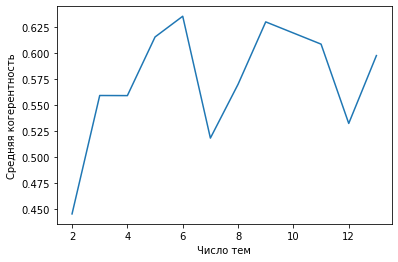

In [317]:
topics_list = [2,3,4,5,6,7,8,9,11,12,13]
coherences = []

for num in tqdm(topics_list):
    lda = ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=num, chunksize=50, update_every=1, passes=2)
    coherences.append(CoherenceModel(model=lda, texts=data['text'], dictionary=dictionary, coherence='c_v').get_coherence())

plt.plot(topics_list, coherences)
plt.xlabel("Число тем")
plt.ylabel("Средняя когерентность")
plt.show()

Подробнее о метриках для оценки тематических моделей:
1. [Перплексия](http://qpleple.com/perplexity-to-evaluate-topic-models/)
2. Когерентность: [один пост](http://qpleple.com/topic-coherence-to-evaluate-topic-models/), [другой пост](https://towardsdatascience.com/evaluate-topic-model-in-python-latent-dirichlet-allocation-lda-7d57484bb5d0)

In [318]:
lda_15 = ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=6, chunksize=50, update_every=1, passes=2)
vis_data = gensimvis.prepare(lda_15, corpus, dictionary)
pyLDAvis.display(vis_data)

C:\Users\zald\AppData\Roaming\Python\Python39\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
